# Conexión: S2 & **Profundiza**

## Previamenten, en la sesión 01:

In [ ]:
!pip install nltk

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
from collections import Counter
from nltk import word_tokenize

tokenize = word_tokenize

contador = Counter(tokenize( 

"¡Feliz cumpleaños, ! Es un honor hacer equipo con mexicanas talentosas como tú honor. ".lower())) 

print(contador) 

In [ ]:
contador.most_common()

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
import pandas as pd

In [ ]:
contador = Counter("hay momentos en la historia en donde los pueblos se juegan su destino. Hoy es uno de esos momentos.") 

print(contador) 

In [ ]:
stopwords_sp = stopwords.words('spanish')
print(stopwords_sp)

In [ ]:
stopwords_en = stopwords.words('english')
print(stopwords_en)

In [ ]:
import string

In [ ]:
import string
def quita_puntuacion(texto):
  for caracter in texto:
    if caracter in string.punctuation:
      texto = texto.replace(caracter, '')
  return texto

In [ ]:
quita_puntuacion("hola, no . voy ?")

In [ ]:
import regex as re
def tokeniza(texto):
    return re.findall(r'[\w]*\p{L}[\w]*', texto) 

In [ ]:
def quita_stopword(palabras):
    return [palabra for palabra in palabras if palabra.lower() not in stopwords_sp]

In [ ]:
pipeline = [ quita_puntuacion, str.lower, str.strip, tokeniza, quita_stopword]

def preprocesa_texto(texto, operaciones):
    palabras_temporal = texto
    for funcion in pipeline:
        palabras_temporal = funcion(palabras_temporal)
        
    return palabras_temporal

## S2: Construcción de un corpus con otros formatos

In [ ]:
!unzip /content/datos.zip -d archivos

In [ ]:
reviews_textos[0:12]

In [ ]:
corpus = pd.DataFrame(reviews_textos, columns=['reviews'])

In [ ]:
corpus.head(5)

In [ ]:
corpus['tokens'] = corpus['reviews'].apply(preprocesa_texto, operaciones=pipeline)
corpus.head()

In [ ]:
len(corpus)

In [ ]:
corpus.describe()

In [ ]:
corpus.shape

In [ ]:
corpus_palabras = []
corpus_palabras = list(i for j in corpus.tokens.to_list() for i in j)

In [ ]:
len(corpus_palabras)

In [ ]:
corpus_palabras[0:15]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def nube_palabras(corpus, stopwords, color):
    stopwords = set(stopwords)
    wordcloud = WordCloud(
        background_color=color,
        stopwords=stopwords,
        max_words=100,
        max_font_size=45,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
nube_palabras(corpus_palabras, stopwords_sp, '#b9d5fd')

### WebScrapping: páginas web

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

# Word2Vec
## Word2vec es una técnica para el procesamiento del lenguaje natural publicada en 2013. El algoritmo word2vec utiliza un modelo de red neuronal para aprender asociaciones de palabras de un gran corpus de texto. Una vez entrenado, dicho modelo puede detectar palabras sinónimas o sugerir palabras adicionales para una oración parcial. Como su nombre lo indica, word2vec representa cada palabra distinta con una lista particular de números llamada vector.

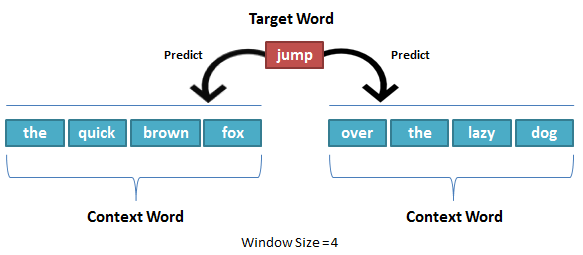

# “i like _____ language processing”

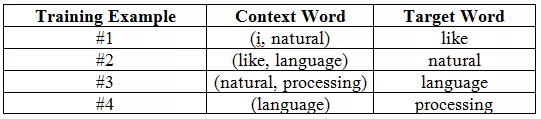

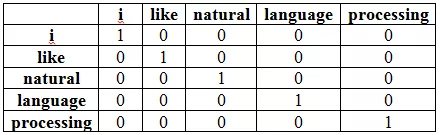

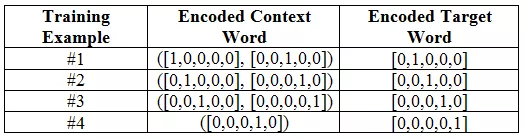

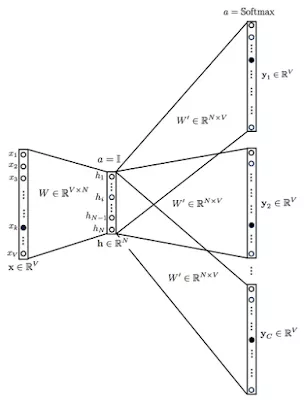

In [ ]:
from gensim.models import word2vec

In [ ]:
corpus.head()

#Pysentimiento

Una biblioteca basada en Transformer para tareas de SocialNLP.

Actualmente admite:

* Análisis de Sentimiento (Español, Inglés)

* Análisis de emociones (español, inglés)

* Detección de discursos de odio (español, inglés)

In [ ]:
!pip install pysentimiento

# huggingface:
Hugging Face, una empresa que creó por primera vez una aplicación de chat para adolescentes aburridos, ofrece tecnologías de PNL de código abierto y, el año pasado, recaudó 15 millones de dólares para crear una biblioteca de PNL definitiva. Desde su aplicación de chat hasta el día de hoy, Hugging Face ha podido desarrollar rápidamente su experiencia en el procesamiento del lenguaje.

[huggingface](https://huggingface.co/)


In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

## ¿Cómo lo aplicas a tus datos?

# WordTree
Esta biblioteca de Python genera diagramas de árbol de palabras. Los diagramas de árbol de palabras muestran la frecuencia con la que aparecen diferentes frases en un corpus que contienen una palabra clave específica.

In [ ]:
!pip install wordtree

In [ ]:
textos = ["I like natural language processing", " drink natural juice", "natural born killer" ]


In [ ]:
import wordtree

In [ ]:
from IPython.display import Image

In [ ]:
treeImage = wordtree.search_and_draw(corpus=textos, keyword='natural')

In [ ]:
treeImage.render()

In [ ]:
Image('natural.gv.png')

In [ ]:
print()

# t-distributed stochastic neighbor embedding (t-SNE):
## es un método estadístico para visualizar datos de alta dimensión al dar a cada punto de datos una ubicación en un mapa bidimensional o tridimensional.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def visualizar_modeloo_TSNE(modelo,perplejidad, dimensiones, iteraciones):
    etiquetas = []
    tokens = []

    # agregar el vocabulario y configurar t-SNE
    for palabra in modelo.wv.vocab:
        tokens.append(modelo[palabra])
        etiquetas.append(palabra)

    tsne_modelo = TSNE(perplexity= perplejidad, n_components= dimensiones, n_iter=iteraciones, verbose=1)
    nuevos_valores = tsne_modelo.fit_transform(tokens)
    x = []
    y = []
    for value in nuevos_valores:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(32, 32)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(etiquetas[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
visualizar_modeloo_TSNE(modeloW2V, 5, 2, 300)

# Reto de Analítica de Textos.
1. Crear o utilizar un corpus para realizar operaciones de analítica.
2. Realizar el pipeline básico
3. Mostrar frecuencias de palabras y wordcloud.
4. Usar Pysentimiento o Hugginface para obtener sentimientos.
5. Opcional:
    * Visualizar con T-SNE
    * Crear un clasificador binario de textos.